# Electrophysiological Time-Series

Welcome to the Voytek Lab GitHub and Jupyter notebook collection. This is the second Jupyter notebook of a tutorial series aiming to get those interested in doing meaningful work in Voytek lab up to speed. We use this tool to learn how to load our data and graph it.

The purpose of this notebook is to:
* Learn how to load data with a npy file 
* Learn the purpose of Sampling and Aliasing
* Generate a time axis and plot the time series as a graph
* Learn (generally) what our generated graph shows
* Learn about different wave types and burstiness
* Introduce you to reference nodes


### Default Imports

First, we will import some basic python libraries that contain functions in order to do this tutorial.

In [15]:

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

## Part 1: Loading, Sampling, Generating a time axis, Analyzing

### Loading data with npy file

We will now load in our data which is a voltage series.

In [11]:
volt = np.load('./exampledata.npy') # voltage series

### Sampling & Aliasing

In order to generate our time axis, we must set a sampling rate. What does this mean you might ask? Jack Schaedler at [his interactive tutorial page](https://jackschaedler.github.io/circles-sines-signals/aliasing.html) does an excellent job of explaining this under "Sampling & Aliasing", so read up and return!

-----------------------------------------------------------------------------------------------------------------------------

To go further in depth, the sampling rate is important for how we analyze data in the frequency domain. When you digitally record a signal, you measure it at a certain rate by taking samples x times per second (quantified in Hertz). For this reason, we don't know the exact amplitude of any digital signal at every single point in time. Our best guess is the closest sample to a given point in time.


Resampling, PSD, and many other things we do in this lab fall under the title of Digital Signal Processing. You can read more about it for free [here](http://dspguide.com/)

##### So why should we Sample?

We sample because there is a cost to data which is memory. If we have a faster sampling rate, we can have better temporal resolution but storing excessive samples can make the file size too big and use too much memory. Sometimes you will have extremely large data sets that simply take too much memory so we take sample rates to divide that space usage. It is possible to oversample which means that we have more samples than necessary which would make our files unneccesarily large, but there is also undersampling which is when we lose information by not sampling enough, but in return we can make our files smaller. The sample rate is something that we must choose carefully as there is a trade off for both sides.

-----------------------------------------------------------------------------------------------------------------------------
If you would like further information on how to choose a good sampling rate, take a look at Schaedler's interactive site https://jackschaedler.github.io/circles-sines-signals/sampling.html under "The Sampling Theorem"



To show how sampling can go wrong if we jump to conclusions, take a look at figure 1 shown below. 

We have four different 2 hour flights from Paris to Berlin with a sample rate of 10 minutes. We should take care not to "connect the dots" as we can see that figure 1 has the same sample rates for four different flights which all create the same graph (shown in grey). We can see here, however, that they are drastically different altitude patterns when we see the overall flight altitudes of each flight.

![image1.png](img/image1.png)
from [Jack Schaedler](https://jackschaedler.github.io/circles-sines-signals/aliasing.html)

### Generate time axis

Now, we will generate our time axis. We will set our sampling rate to be 1000 in this example case.

In [12]:
rate = 1000. # sampling rate
time = np.arange(0,len(volt)/rate, 1/rate) #time series

### 1. Plot the time series

We have our time series and now we will visualize it by graphing it.

(9, 10.5)

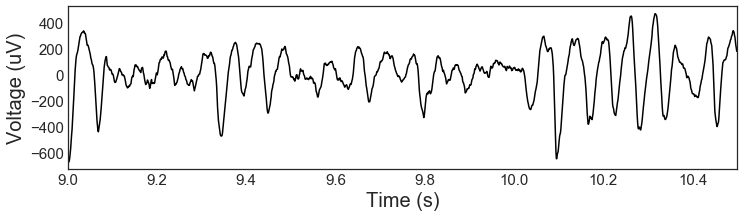

In [13]:
time_plot = [9, 10.5] # time range you want to plot
time_plot_idx = np.where(np.logical_and(time>=time_plot[0], time < time_plot[1]))[0]
plt.figure(figsize=(12,3))
plt.plot(time[time_plot_idx], volt[time_plot_idx],'k')
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Time (s)',size=20)
plt.ylabel('Voltage (uV)',size=20)
plt.xlim((time_plot))

##### Analyzing our graph
Neural data has rythmic patterns that are variable as well as other patterns that are "bursty" i.e non continuous shown above. Our graph also has 8 peaks in half a second which is equal to 16 Hz, making this a Beta wave.

Different neural oscillatory patterns have different ranges and the general ranges are shown below.

![image2.jpg](img/image2.jpg)
from [mindbodyvortex](http://www.mindbodyvortex.com/wp-content/uploads/2015/09/f3a6b3eb4cc6f2d7392b34284c233281.jpg)

## Part 2:  Ground vs. Referencing

To learn more about ground vs. reference for EEG recordings, we can visit 
1. https://www.biopac.com/knowledge-base/ground-vs-reference-for-eeg-recording/
2. (https://www.researchgate.net/post/What_is_the_difference_between_ground_and_reference_electrode_in_EEG_recording)

To summarize,

An EEG (electroencephalogram)is the potential difference between an active electrode and a reference electrode.
Voltage signals are always relative. You can have different references.

The ground electrode is used to reduce artifacts (electrical circuit, mouvement...), preventing noise from interfering with the signals of interest.

Referencing is when you have an electrode you use to measure the electrical difference between the active electrode and itself.


"The reference lead is the lead that connects the reference electrode; in EEG recordings, this electrode is usually placed at the ear or, in the case of “summed ears,” to a pair of electrodes, one at each ear. The measured electrical potential differences are ideally the voltage drops from the active electrode to the reference electrode.


## Part 3: Neural Oscillations

# UNDER CONSTRUCTION